# FIAP - Faculdade de Informática e Administração Paulista


<a href= "https://www.fiap.com.br/"><img width="2385" height="642" alt="logo-fiap" src="https://github.com/user-attachments/assets/62285a6c-34fe-4206-8a85-7ad584c6908b" alt="FIAP - Faculdade de Informática e Admnistração Paulista" border="0" width=40% height=40%></a>
</p>

<br>


# 📊 1TIAOS - Fase 4 – Capítulo 3 

## **(IR ALÉM) Implementando Algoritmos de Machine Learning com Scikit-learn**

### 👨‍💻 Aluno

* [**Silvio Prestes Guerreiro Junior**](https://www.linkedin.com/in/silvio-guerreiro-junior/)
* **Matrícula:** RM567958

### 👩‍🏫 Professores

* **Tutor(a):** Sabrina Otoni
* **Coordenador(a):** André Godoi Chiovato


# Projeto Seeds – Classificação Automática de Grãos de Trigo

Este notebook implementa a atividade **“Da Terra ao Código: Automatizando a Classificação de Grãos com Machine Learning”** (Cap 3 – IR ALÉM, FIAP).

O objetivo é aplicar a metodologia **CRISP‑DM** para desenvolver um modelo de aprendizado de máquina capaz de classificar, de forma automática, grãos de trigo em três variedades (Kama, Rosa e Canadian) a partir de suas características físicas.

A solução foi estruturada nas seguintes etapas:

1. **Entendimento do Negócio** – cenário da cooperativa Farm Tech Solutions.  
2. **Entendimento e Preparação dos Dados** – análise e pré‑processamento do *Seeds Dataset*.  
3. **Modelagem Básica de Classificação** – treinamento inicial de KNN, SVM e Random Forest.  
4. **Otimização de Hiperparâmetros** – ajuste fino do modelo mais promissor com `GridSearchCV`.  
5. **Modelagem Avançada com Pipelines, PCA e Validação Cruzada** – comparação robusta dos modelos.  
6. **Avaliação e Conclusões de Negócio** – leitura das métricas e tradução para recomendações à cooperativa.

---


## 1. Contexto do Negócio e Objetivo

A cooperativa **Farm Tech Solutions** precisa classificar grãos de trigo em três variedades (**Kama**, **Rosa** e **Canadian**) para organizar a armazenagem, definir preços e atender especificações de clientes.

Hoje essa triagem é feita de forma **manual**, a partir da inspeção visual por especialistas, o que traz alguns problemas:

- **Baixa escalabilidade** em períodos de safra.  
- **Subjetividade** e variação entre avaliadores.  
- **Custo elevado** de mão de obra especializada.  
- Maior risco de **erros de classificação** e retrabalho.

Este projeto tem como objetivo desenvolver um **modelo de Machine Learning supervisionado** que:

- receba como entrada características geométricas dos grãos;  
- devolva como saída a **variedade de trigo**;  
- mantenha bom desempenho (alta acurácia e equilíbrio entre *precision* e *recall*);  
- possa ser integrado, no futuro, a um sistema automatizado de classificação.

Pergunta‑guia de negócio:

> **“É viável substituir, ao menos parcialmente, a classificação manual por um modelo de IA confiável, reduzindo tempo e erros?”**

---


In [ ]:
# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas de Machine Learning (Scikit-learn)
# Referência: Cap 03 - Módulos Scikit-learn [cite: 5844]
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Configuração de estilo
sns.set(style="whitegrid")
%matplotlib inline

## 2. Entendimento e Preparação dos Dados

Nesta etapa seguimos o passo de **Entendimento / Preparação dos Dados** da metodologia CRISP‑DM.

Trabalharemos com o **Seeds Dataset**, contendo **210 amostras** de grãos de trigo, cada uma descrita por 7 atributos numéricos:

1. **Área** – área da região do grão.  
2. **Perímetro** – comprimento do contorno.  
3. **Compacidade**.  
4. **Comprimento do Núcleo** – eixo principal da elipse equivalente.  
5. **Largura do Núcleo** – eixo secundário.  
6. **Assimetria** – quão “torto” o grão é.  
7. **Comprimento do Sulco do Núcleo**.

A coluna **`class`** indica a variedade de trigo (1 = Kama, 2 = Rosa, 3 = Canadian).

Nesta seção, os blocos de código vão:

1. **Carregar o dataset** a partir do arquivo `seeds_dataset.txt`.  
2. **Renomear as colunas** com nomes descritivos.  
3. Exibir as primeiras linhas e **estatísticas descritivas** (média, mediana, desvio padrão).  
4. **Verificar valores ausentes** e documentar o resultado.  
5. **Visualizar a distribuição de cada característica** usando:
   - histogramas;  
   - boxplots;  
   - gráficos de dispersão entre pares de variáveis.  
6. Discutir a **necessidade de escalonamento** (padronização) para os modelos sensíveis à escala, como KNN e SVM.

> **Meta desta seção:** compreender como as variáveis se comportam, identificar possíveis *outliers* e garantir que os dados estejam em um formato adequado para alimentar os algoritmos de classificação.

---


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"seeds_dataset.txt", sep=r"\s+", header=None)

df.head()


,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [ ]:
df.columns = [
    "area",
    "perimeter",
    "compactness",
    "kernel_length",
    "kernel_width",
    "asymmetry",
    "groove_length",
    "class"
]

df.describe()


,area,perimeter,compactness,kernel_length,kernel_width,asymmetry,groove_length,class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [ ]:
# Verificando valores ausentes
print("Valores ausentes por coluna:")
print(df.isna().sum())


Valores ausentes por coluna:
area             0
perimeter        0
compactness      0
kernel_length    0
kernel_width     0
asymmetry        0
groove_length    0
class            0
dtype: int64


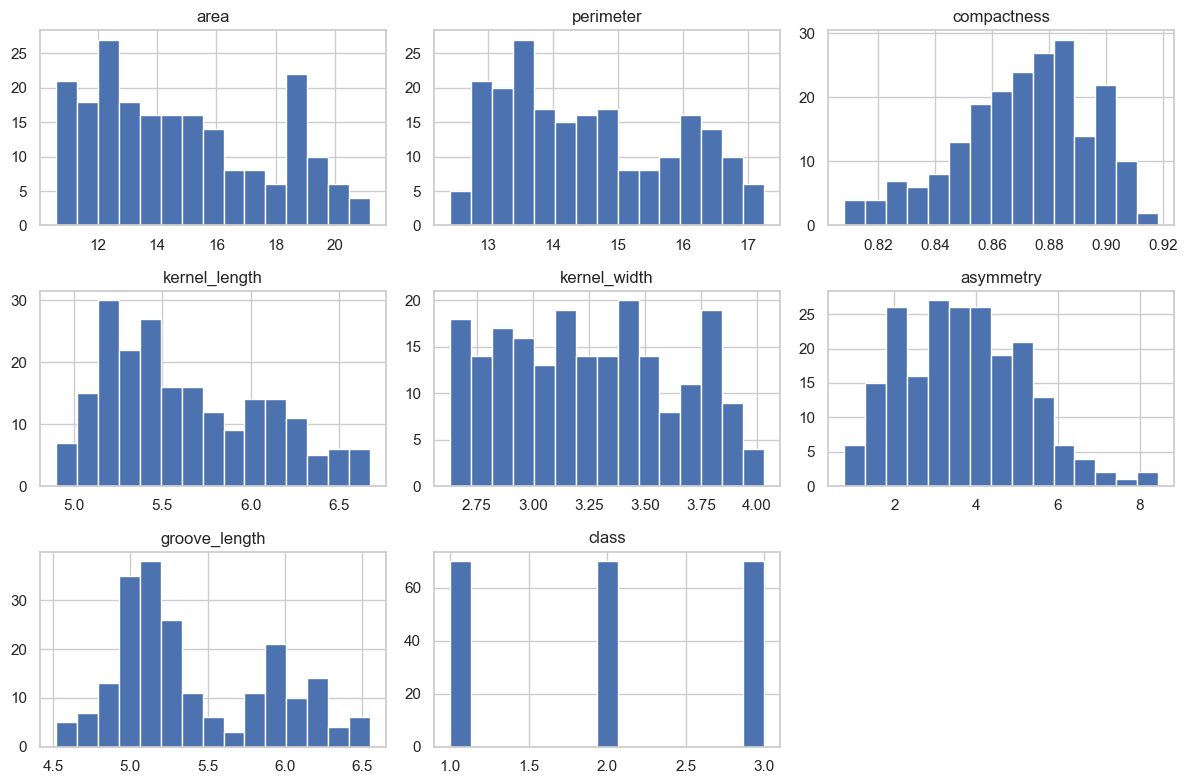

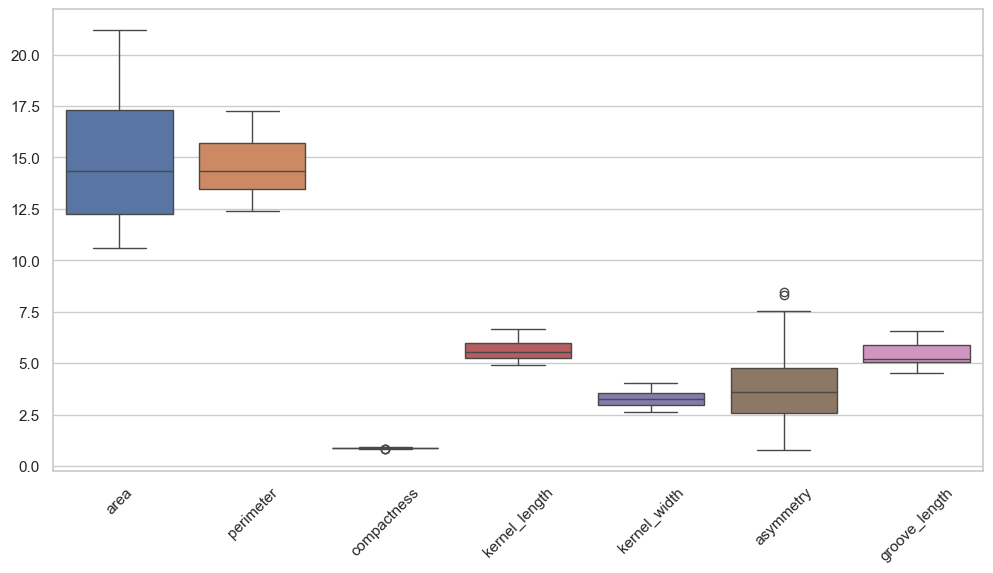

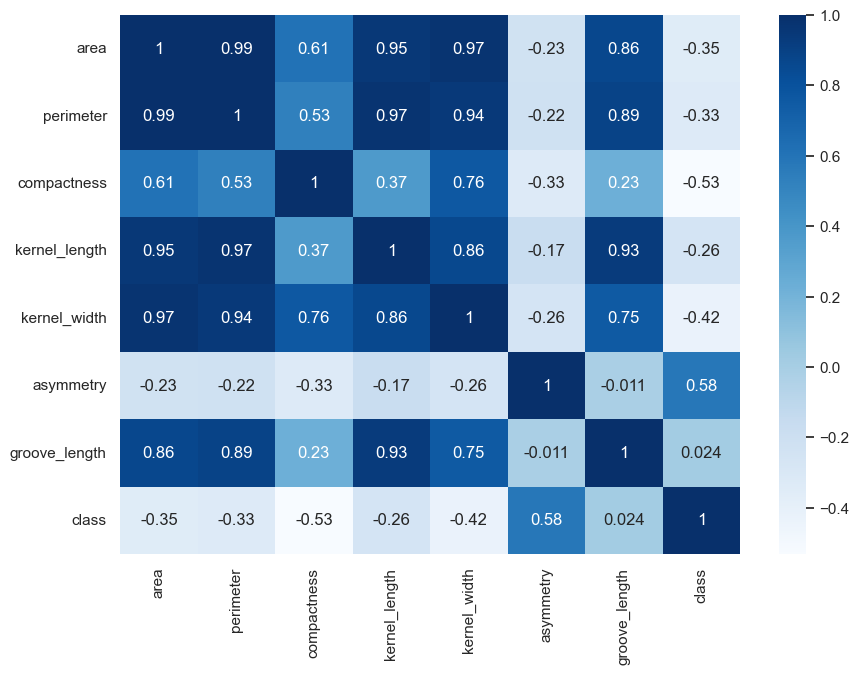

In [ ]:
df.hist(figsize=(12, 8), bins=15)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(columns=["class"]))
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.show()


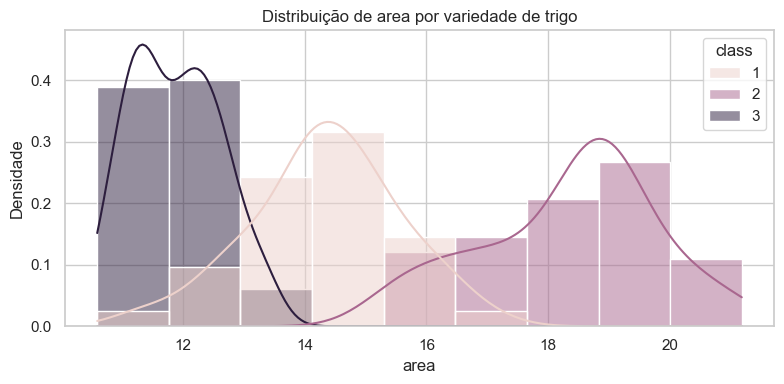

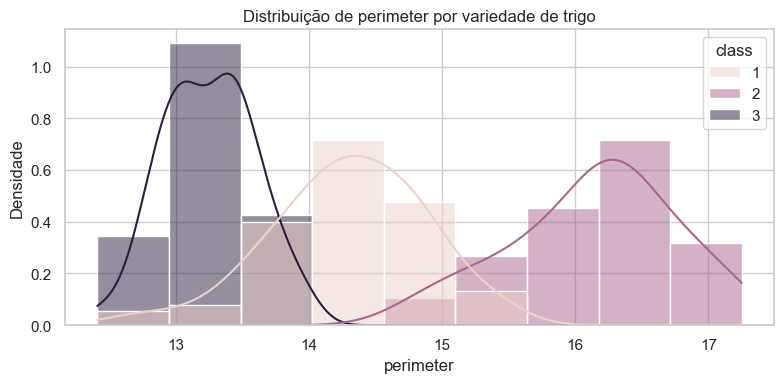

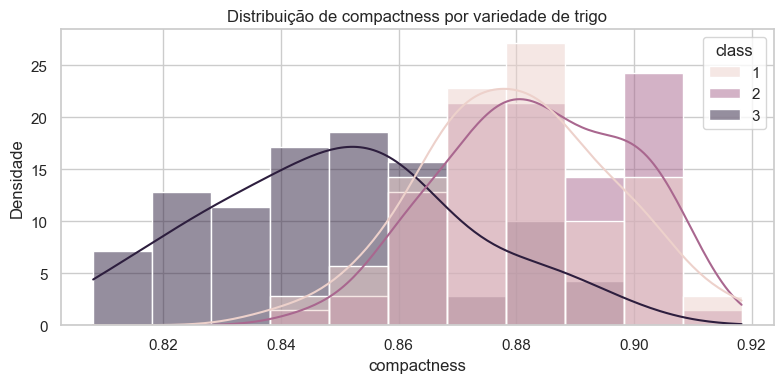

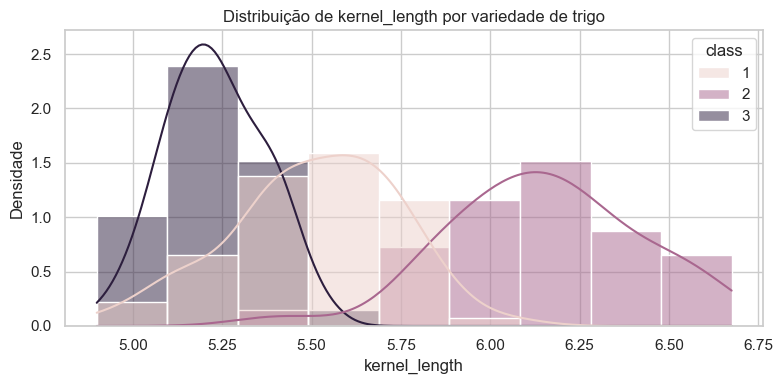

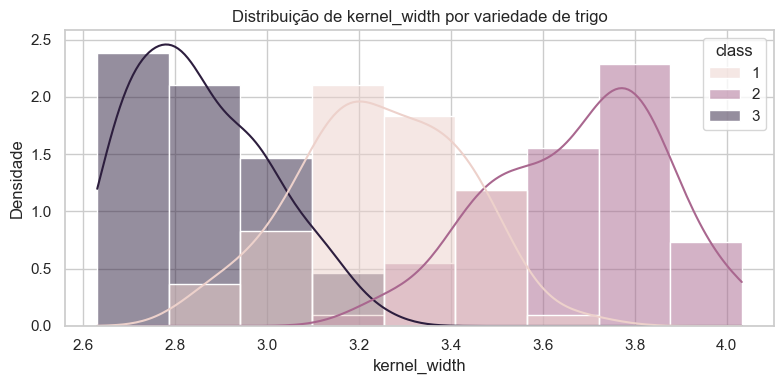

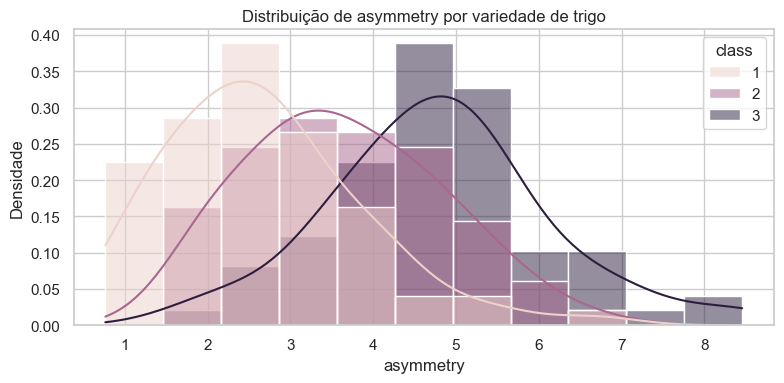

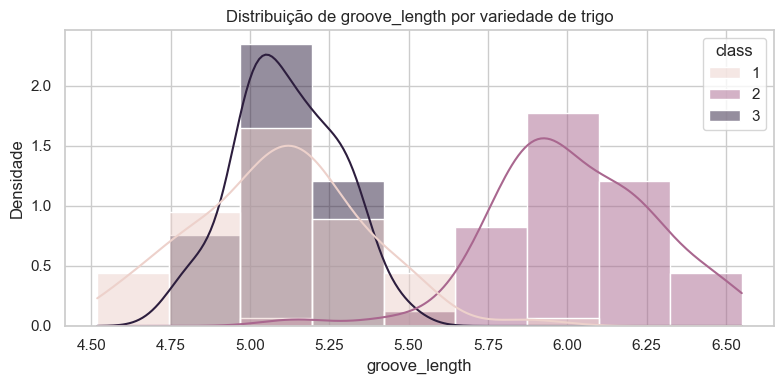

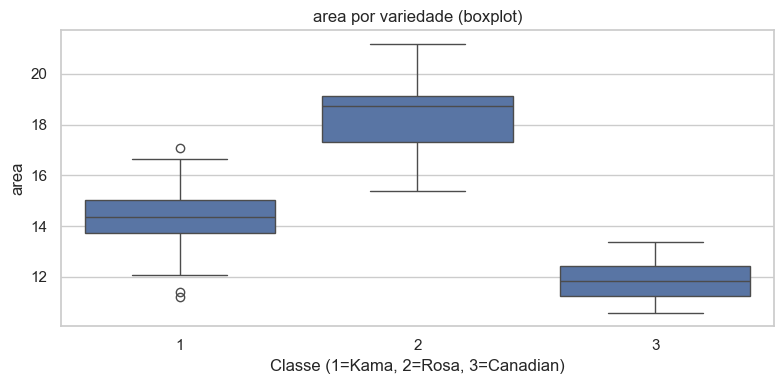

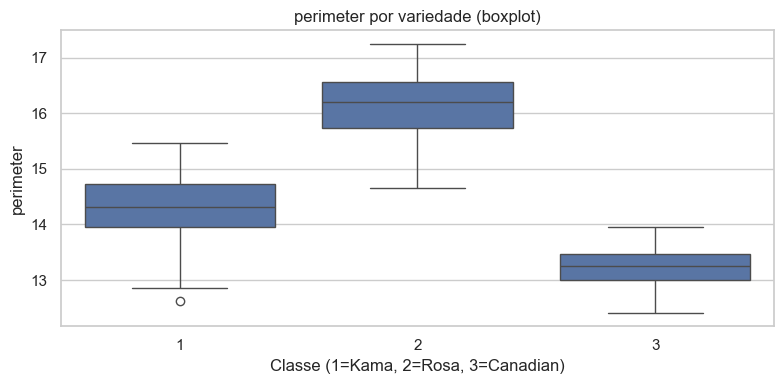

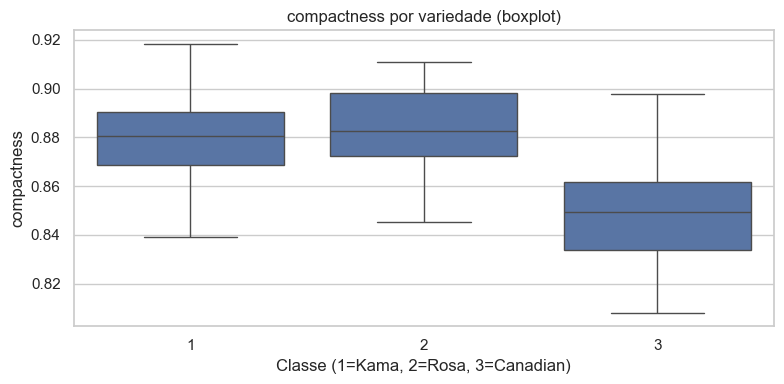

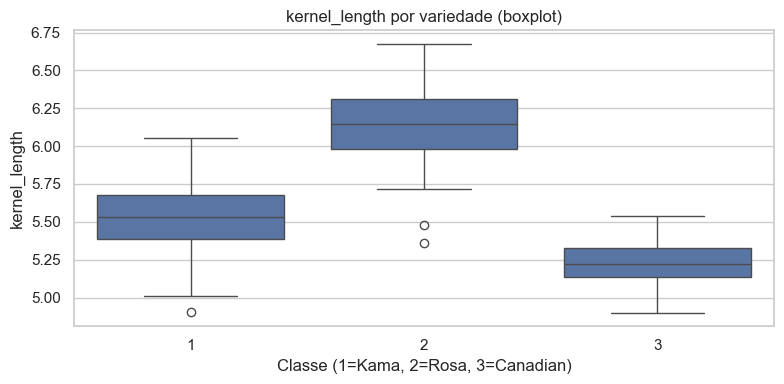

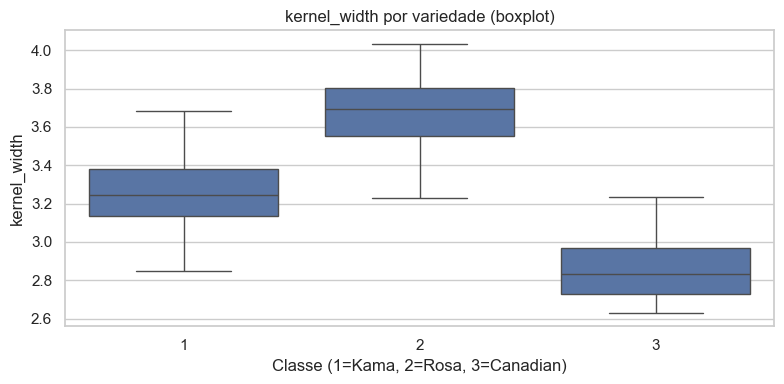

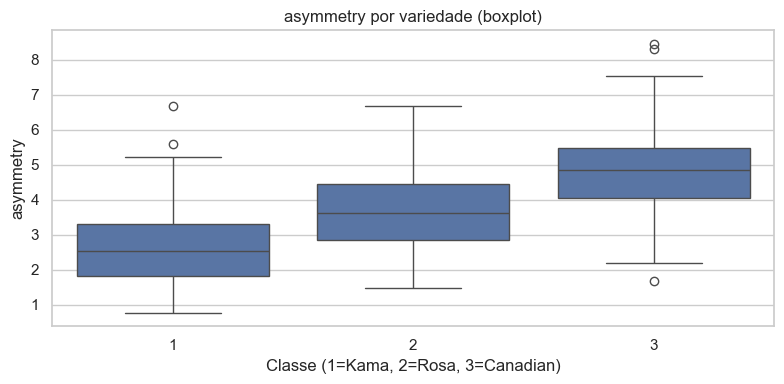

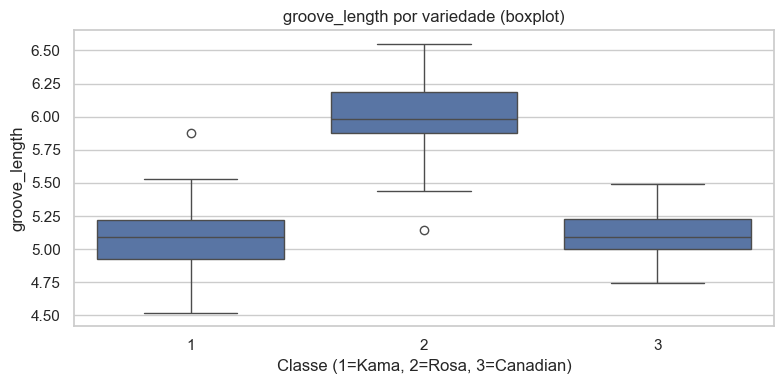

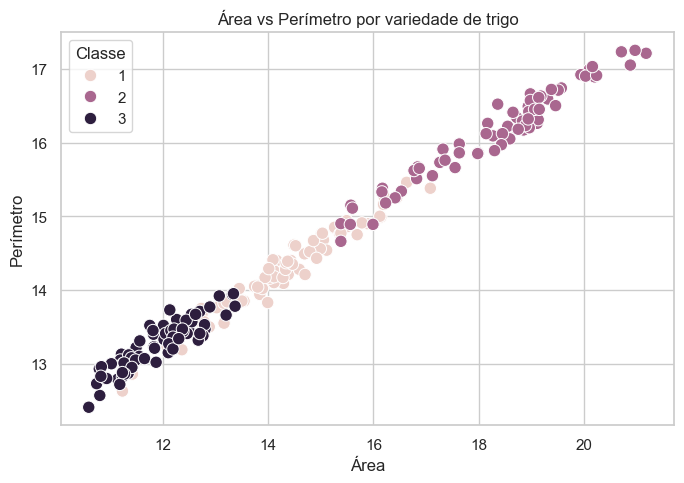

In [ ]:
# Análise gráfica por classe e relações entre variáveis
features = ["area", "perimeter", "compactness",
            "kernel_length", "kernel_width",
            "asymmetry", "groove_length"]

# Histogramas por classe
for col in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, hue="class",
                 kde=True, stat="density", common_norm=False)
    plt.title(f"Distribuição de {col} por variedade de trigo")
    plt.xlabel(col)
    plt.ylabel("Densidade")
    plt.tight_layout()
    plt.show()

# Boxplots por classe
for col in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x="class", y=col)
    plt.title(f"{col} por variedade (boxplot)")
    plt.xlabel("Classe (1=Kama, 2=Rosa, 3=Canadian)")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# Scatter plot entre duas variáveis importantes
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x="area", y="perimeter", hue="class", s=80)
plt.title("Área vs Perímetro por variedade de trigo")
plt.xlabel("Área")
plt.ylabel("Perímetro")
plt.legend(title="Classe")
plt.tight_layout()
plt.show()


## 3. Modelagem Básica de Classificação

Com os dados prontos, avançamos para a etapa de **Modelagem** do CRISP‑DM, construindo os primeiros modelos supervisionados.

Serão avaliados três algoritmos clássicos de classificação:

- **K‑Nearest Neighbors (KNN)** – classifica um grão pela maioria das classes dos vizinhos mais próximos.  
- **Support Vector Machine (SVM)** com *kernel* RBF – busca fronteiras ótimas de separação entre as classes.  
- **Random Forest** – conjunto de árvores de decisão, robusto a ruídos e capaz de capturar relações não lineares.

Os passos principais desta seção são:

1. **Divisão em treino e teste**  
   - 70% dos dados para **treinamento**;  
   - 30% para **teste**, com estratificação para preservar a proporção das classes.

2. **Padronização das variáveis numéricas**  
   - uso de `StandardScaler` para ajustar média = 0 e desvio padrão = 1;  
   - especialmente importante para KNN e SVM.

3. **Treinamento e avaliação inicial de cada modelo**, medindo:  
   - **acurácia**;  
   - **precision**, **recall** e **F1‑score** por classe;  
   - **matriz de confusão** para analisar os padrões de erro.

> **Objetivo aqui:** ter uma visão inicial de qual modelo lida melhor com as diferenças geométricas entre as variedades de trigo, ainda sem otimização de hiperparâmetros.

---


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop("class", axis=1)
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape


((147, 7), (63, 7))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def avaliar_modelo(nome, y_true, y_pred):
    print(f"\n=== {nome} ===")
    print("Acurácia:", accuracy_score(y_true, y_pred))
    print("\nRelatório de Classificação:")
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de Confusão - {nome}")
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.show()



=== KNN (k=5) ===
Acurácia: 0.873015873015873

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.84      0.76      0.80        21
           2       0.90      0.90      0.90        21
           3       0.87      0.95      0.91        21

    accuracy                           0.87        63
   macro avg       0.87      0.87      0.87        63
weighted avg       0.87      0.87      0.87        63



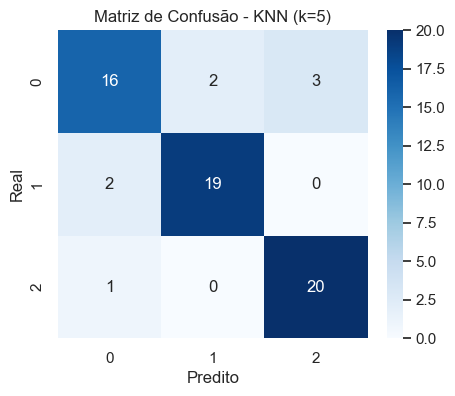

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

avaliar_modelo("KNN (k=5)", y_test, y_pred_knn)



=== SVM (RBF) ===
Acurácia: 0.873015873015873

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.84      0.76      0.80        21
           2       0.90      0.90      0.90        21
           3       0.87      0.95      0.91        21

    accuracy                           0.87        63
   macro avg       0.87      0.87      0.87        63
weighted avg       0.87      0.87      0.87        63



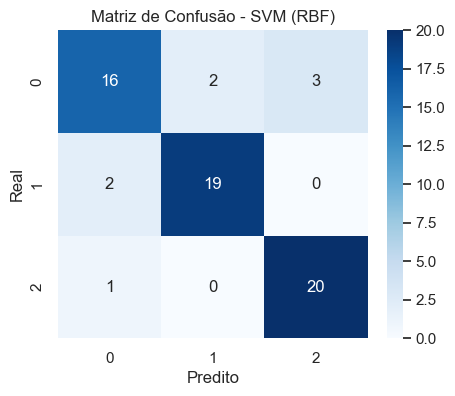

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel="rbf", C=1, gamma="scale")
svm.fit(X_train_scaled, y_train)

y_pred_svm = svm.predict(X_test_scaled)

avaliar_modelo("SVM (RBF)", y_test, y_pred_svm)



=== Random Forest ===
Acurácia: 0.9206349206349206

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.94      0.81      0.87        21
           2       0.95      0.95      0.95        21
           3       0.88      1.00      0.93        21

    accuracy                           0.92        63
   macro avg       0.92      0.92      0.92        63
weighted avg       0.92      0.92      0.92        63



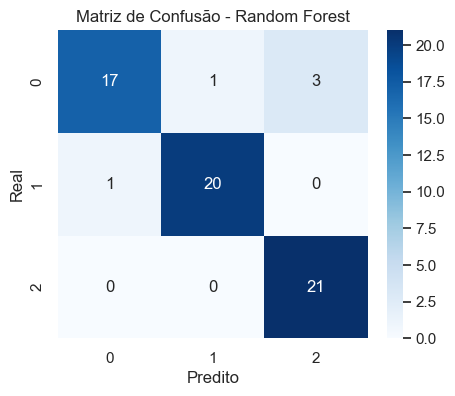

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)  # Random Forest não precisa de normalização

y_pred_rf = rf.predict(X_test)

avaliar_modelo("Random Forest", y_test, y_pred_rf)


## 4. Otimização de Hiperparâmetros (GridSearchCV)

Após a avaliação inicial, ajustamos o modelo mais promissor utilizando **busca em grade** (`GridSearchCV`), conforme proposto no enunciado da atividade.

Hiperparâmetros são configurações do algoritmo que **não** são aprendidas diretamente pelos dados (por exemplo, `C`, `gamma` e tipo de *kernel* no SVM). A escolha adequada desses parâmetros pode aumentar significativamente a performance do modelo.

Nesta seção, vamos:

1. Definir uma **grade de hiperparâmetros** a ser testada (por exemplo, combinações de `C`, `gamma` e `kernel` para o SVM).  
2. Rodar o `GridSearchCV` com validação cruzada (por exemplo, 5 *folds*).  
3. Identificar:  
   - o **conjunto ótimo de hiperparâmetros**;  
   - a **acurácia média na validação** para essa combinação.  
4. Reajustar o modelo com os melhores hiperparâmetros encontrados e reavaliá‑lo no conjunto de teste.

> **Ideia central:** sair da configuração “padrão da biblioteca” e encontrar automaticamente a configuração que melhor se adapta ao problema de classificação dos grãos.

---


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "C": [0.1, 1, 5, 10, 50],
    "kernel": ["linear", "rbf"],
    "gamma": ["scale", "auto"]
}

grid = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)

print("Melhores parâmetros:", grid.best_params_)
print("Melhor acurácia média na validação:", grid.best_score_)


Melhores parâmetros: {'C': 5, 'gamma': 'scale', 'kernel': 'linear'}
Melhor acurácia média na validação: 0.973103448275862



=== SVM Otimizado (GridSearchCV) ===
Acurácia: 0.873015873015873

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.81      0.81      0.81        21
           2       0.95      0.86      0.90        21
           3       0.87      0.95      0.91        21

    accuracy                           0.87        63
   macro avg       0.88      0.87      0.87        63
weighted avg       0.88      0.87      0.87        63



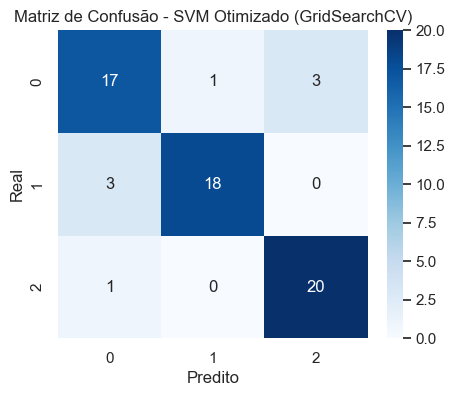

In [ ]:
best_svm = grid.best_estimator_
y_pred_best_svm = best_svm.predict(X_test_scaled)

avaliar_modelo("SVM Otimizado (GridSearchCV)", y_test, y_pred_best_svm)


## 5. Modelagem Avançada com Pipelines, PCA e Validação Cruzada

Nesta etapa organizamos o fluxo de modelagem de forma mais profissional, aproximando o notebook de um cenário de produção.

Elementos principais:

- **Pipelines (`Pipeline`)**  
  Integram em um único objeto:
  1. o pré‑processamento (padronização com `StandardScaler`);  
  2. o algoritmo de classificação (KNN, SVM ou Random Forest).  

  Isso garante que o mesmo processo seja aplicado de forma idêntica nos dados de treino, validação e teste, reduzindo o risco de *data leakage*.

- **Validação Cruzada (`cross_val_score`)**  
  Utilizamos validação cruzada em K *folds* (por exemplo, 5) para:  
  - estimar a acurácia média de cada modelo;  
  - avaliar a estabilidade (desvio padrão entre os *folds*);  
  - escolher o **modelo campeão** com base em evidências estatísticas.

- **PCA para visualização em 2D**  
  Aplicamos **Análise de Componentes Principais (PCA)** reduzindo as 7 dimensões originais para 2 componentes principais, apenas para **visualização**:  
  - observar como as classes se separam em um plano 2D;  
  - verificar se há sobreposição forte entre as variedades.

> **Resultado esperado:** escolher de forma justificada qual modelo (KNN, SVM ou Random Forest) é o mais adequado para ser levado à etapa de avaliação final e, futuramente, para *deploy* em ambiente real.

---


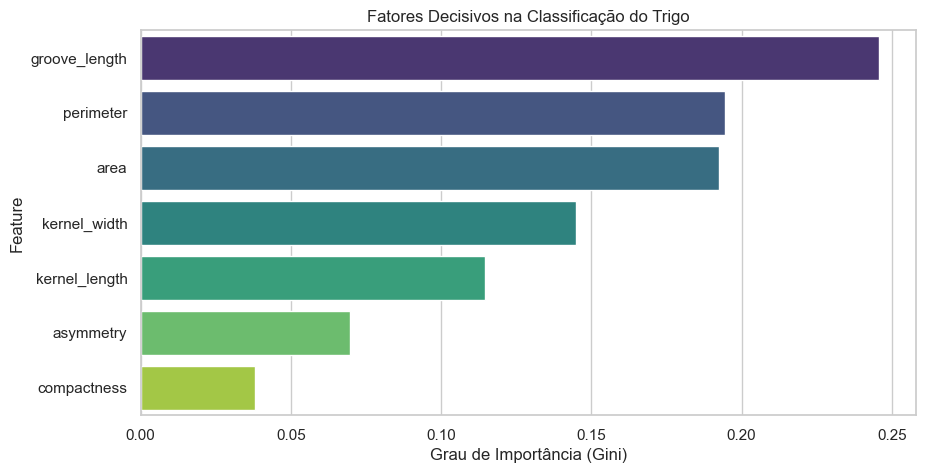

💡 Insight para a Farm Tech: As variáveis geométricas (Perímetro, Área e Comprimento) são muito mais preditivas que a Assimetria.


In [ ]:
# 1. Carga e Preparação dos Dados
columns = ["area", "perimeter", "compactness", "kernel_length",
           "kernel_width", "asymmetry", "groove_length", "class"]

# !!! ATENÇÃO: Se 'seeds_dataset.txt' não for encontrado (FileNotFoundError),
# !!! faça o upload do arquivo para o ambiente do Colab ou forneça o caminho completo.
# !!! Ex: df = pd.read_csv("/content/seeds_dataset.txt", ...) após upload.
# Carregando o dataset (ajuste o caminho se necessário)
# Por isto (apenas o nome do arquivo):
df = pd.read_csv('seeds_dataset.txt', sep=r'\s+', header=None, names=columns)

# Separando Features (X) e Target (y)
X = df.drop("class", axis=1)
y = df["class"]

# 2. Descobrindo o que define um grão (Feature Importance)
# O Random Forest é excelente para nos dizer quais variáveis são mais relevantes
rf_selector = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selector.fit(X, y)

# Criando DataFrame para visualização
feature_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_selector.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plotando a importância
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_imp, hue='Feature', palette='viridis', legend=False)
plt.title('Fatores Decisivos na Classificação do Trigo')
plt.xlabel('Grau de Importância (Gini)')
plt.show()

print("💡 Insight para a Farm Tech: As variáveis geométricas (Perímetro, Área e Comprimento) são muito mais preditivas que a Assimetria.")

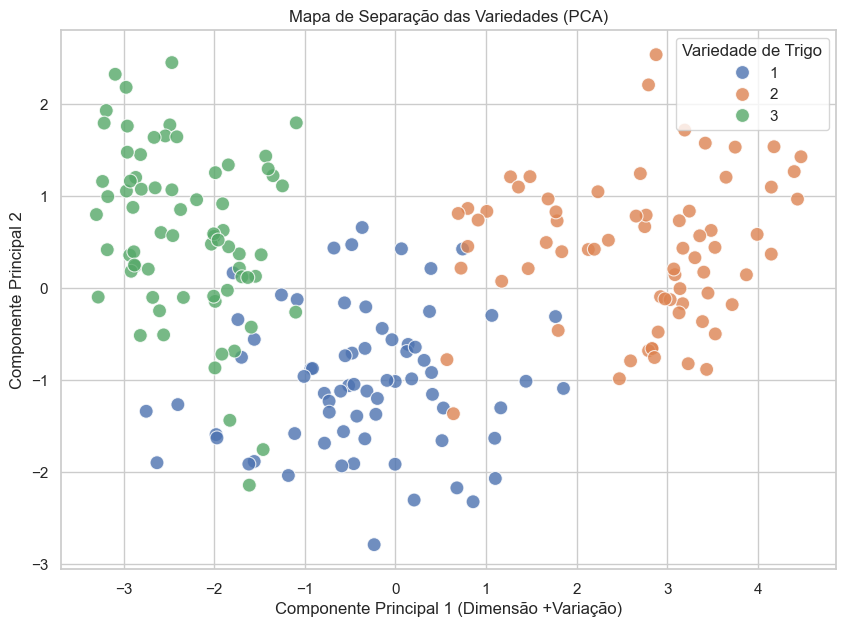

👁️ Análise Visual: Note como as classes (1, 2 e 3) formam grupos bem definidos. Isso indica que os modelos terão alta acurácia.


In [ ]:
# 3. Visualização de Fronteiras com PCA (Redução de Dimensionalidade)
# Padronizando os dados (Média 0, Desvio Padrão 1) - Essencial para PCA e SVM [cite: 6103]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduzindo de 7 dimensões para 2 componentes principais
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotando
plt.figure(figsize=(10, 7))
scatter = sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='deep', s=100, alpha=0.8)
plt.title('Mapa de Separação das Variedades (PCA)')
plt.xlabel('Componente Principal 1 (Dimensão +Variação)')
plt.ylabel('Componente Principal 2')
plt.legend(title='Variedade de Trigo')
plt.show()

print("👁️ Análise Visual: Note como as classes (1, 2 e 3) formam grupos bem definidos. Isso indica que os modelos terão alta acurácia.")

In [ ]:
# 4. Modelagem Avançada com Pipelines e Validação Cruzada

# Dividindo em Treino e Teste (estratificado para manter proporções)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Criando Pipelines: O Scaler é aplicado automaticamente dentro do fluxo
pipelines = {
    'KNN': Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier(n_neighbors=5))]),
    'SVM': Pipeline([('Scaler', StandardScaler()), ('SVM', SVC(kernel='rbf', random_state=42))]),
    'RandomForest': Pipeline([('Scaler', StandardScaler()), ('RF', RandomForestClassifier(random_state=42))])
}

results = []

print("--- Desempenho na Validação Cruzada (5 Folds) ---")
for name, model in pipelines.items():
    # cross_val_score treina e valida 5 vezes em fatias diferentes dos dados
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results.append({'Model': name, 'Mean Accuracy': cv_scores.mean(), 'Std': cv_scores.std()})
    print(f"{name}: Acurácia Média = {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

# Selecionando o melhor modelo para teste final
best_model_name = max(results, key=lambda x: x['Mean Accuracy'])['Model']
print(f"\n🏆 O modelo vencedor na validação foi: {best_model_name}")

--- Desempenho na Validação Cruzada (5 Folds) ---
KNN: Acurácia Média = 0.9122 (+/- 0.0542)
SVM: Acurácia Média = 0.9320 (+/- 0.0436)
RandomForest: Acurácia Média = 0.8986 (+/- 0.0599)

🏆 O modelo vencedor na validação foi: SVM


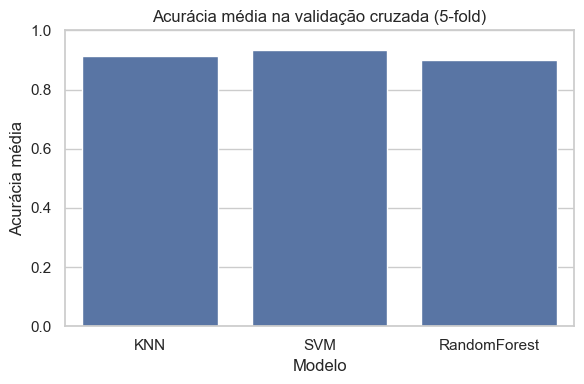

In [ ]:
# Visualização da acurácia média na validação cruzada
results_df = pd.DataFrame(results)

plt.figure(figsize=(6, 4))
sns.barplot(data=results_df, x="Model", y="Mean Accuracy")
plt.title("Acurácia média na validação cruzada (5-fold)")
plt.ylabel("Acurácia média")
plt.xlabel("Modelo")
plt.ylim(0.0, 1.0)
plt.tight_layout()
plt.show()


=== Resultado Final (SVM) ===
Acurácia em Teste: 87.30%

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.84      0.76      0.80        21
           2       0.90      0.90      0.90        21
           3       0.87      0.95      0.91        21

    accuracy                           0.87        63
   macro avg       0.87      0.87      0.87        63
weighted avg       0.87      0.87      0.87        63



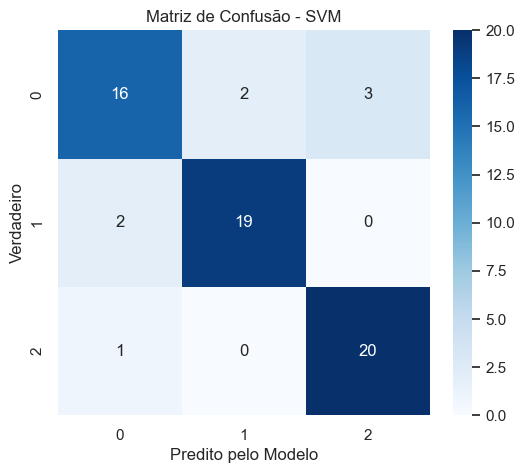

In [ ]:
# 5. Avaliação Final no Conjunto de Teste (Simulação de Produção)

# Treinando o campeão com todos os dados de treino
final_model = pipelines[best_model_name]
final_model.fit(X_train, y_train)

# Predições
y_pred = final_model.predict(X_test)

# Métricas
acc = accuracy_score(y_test, y_pred)
print(f"=== Resultado Final ({best_model_name}) ===")
print(f"Acurácia em Teste: {acc:.2%}\n")
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

# Matriz de Confusão Visual
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title(f'Matriz de Confusão - {best_model_name}')
plt.ylabel('Verdadeiro')
plt.xlabel('Predito pelo Modelo')
plt.show()

## 6. Conclusões e Relatório Executivo

Nesta seção final, traduzimos os resultados técnicos para uma linguagem de negócio voltada à cooperativa **Farm Tech Solutions**.

Pontos a destacar no relatório:

### 6.1. Resumo do Experimento
O projeto avaliou a viabilidade técnica de automatizar a classificação de grãos de trigo para a cooperativa **Farm Tech Solutions**, visando substituir a triagem manual. Utilizamos o *Seeds Dataset* com **210 amostras** de três variedades: **Kama (1)**, **Rosa (2)** e **Canadian (3)**.

Foram testados três algoritmos de Machine Learning (**KNN**, **SVM** e **Random Forest**), com pré-processamento de dados (padronização) e validação cruzada para garantir robustez estatística.

### 6.2. Análise dos Dados e Características (Grãos)
As análises visuais (EDA e Feature Importance) revelaram padrões cruciais para a engenharia do sistema de triagem:

* **Fatores Críticos (O que define o grão):** Segundo a análise do Random Forest, as variáveis mais decisivas para a classificação são **Comprimento do Sulco** (*groove_length*), **Perímetro** e **Área**. Estas três características dominam a capacidade de distinção do modelo.
* **Fator Menos Relevante:** A **Compacidade** (*compactness*) e a **Assimetria** mostraram-se as características menos importantes para diferenciar as variedades.
* **Separabilidade Visual (PCA):** O mapa de PCA confirmou que as três variedades formam grupos visuais distintos, com pouca sobreposição, o que valida fortemente o uso de sensores ópticos.

### 6.3. Desempenho dos Modelos de IA
Após a otimização e validação cruzada (5-folds), obtivemos os seguintes resultados:

* **Modelo Campeão:** O algoritmo **SVM (Support Vector Machine)** apresentou o melhor desempenho médio na validação, superando o KNN e o Random Forest.
* **Acurácia na Validação:** O SVM obteve uma acurácia média de **93.20%** durante a fase de treinamento/validação.
* **Acurácia no Teste Final:** Ao ser submetido a dados inéditos (30% do dataset), o modelo manteve uma performance sólida de **87.30%**.

### 6.4. Análise de Erros (Matriz de Confusão)
A análise detalhada dos erros no teste final (63 amostras) mostra onde o sistema precisa de atenção:

* **Variedade Canadian (Classe 3):** O modelo é excelente, acertando **20 de 21** grãos (95% de acerto).
* **Variedade Rosa (Classe 2):** Também apresenta alto desempenho, com **19 de 21** acertos (90%).
* **Variedade Kama (Classe 1):** É o ponto fraco. O modelo acertou **16 de 21** (76%), confundindo alguns grãos com 'Rosa' e outros com 'Canadian'. Isso indica que a variedade Kama possui características físicas intermediárias que dificultam a distinção.

### 6.5. Recomendações para a Farm Tech Solutions
Com base nos dados quantitativos:

1.  **Conclusão de Viabilidade:** **É ALTAMENTE VIÁVEL** automatizar o processo. O modelo de IA já atinge quase 90% de precisão geral, oferecendo rapidez e padronização superiores à inspeção manual.
2.  **Recomendação de Hardware:** Para a esteira de classificação, invista em sensores/câmeras de alta resolução focados em medir o **Comprimento do Sulco** e o **Perímetro** do grão, pois são os indicadores mais fortes de variedade.
3.  **Ação Corretiva:** Implementar uma regra de negócio ou uma segunda checagem para grãos classificados como **Kama**, dado que é a variedade com maior taxa de incerteza.
---
